# **CLASSIFICATION**

# Pandas Profilling

In [ ]:
# Load Dataset
from pycaret.datasets import get_data
cancer = get_data('cancer', profile=True)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


# Setup

In [ ]:
from pycaret.classification import *
# Initialize the setup
clf1 = setup(data=cancer, target='Class', session_id=123,  experiment_name='Cancer_Classification', numeric_imputation='mean')

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(683, 10)"
4,Transformed data shape,"(683, 10)"
5,Transformed train set shape,"(478, 10)"
6,Transformed test set shape,"(205, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


# Compare Model

In [3]:
best_model = compare_models(sort='Accuracy')
best_model

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:28:30
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9687,0.9967,0.9643,0.9495,0.9557,0.9315,0.9329,0.0950
svm,SVM - Linear Kernel,0.9686,0.9964,0.9522,0.9613,0.9533,0.9299,0.9333,0.0180
knn,K Neighbors Classifier,0.9645,0.9869,0.9463,0.9543,0.9489,0.9217,0.9233,0.0330
lr,Logistic Regression,0.9623,0.9964,0.9342,0.9597,0.9445,0.9161,0.9187,0.5760
ridge,Ridge Classifier,0.9623,0.9962,0.9221,0.9721,0.9443,0.9158,0.9188,0.0200
lda,Linear Discriminant Analysis,0.9623,0.9962,0.9221,0.9721,0.9443,0.9158,0.9188,0.0170
catboost,CatBoost Classifier,0.9623,0.9950,0.9460,0.9502,0.9458,0.9170,0.9196,0.8570
nb,Naive Bayes,0.9603,0.9834,0.9761,0.9209,0.9463,0.9150,0.9176,0.0180
rf,Random Forest Classifier,0.9581,0.9953,0.9338,0.9498,0.9394,0.9074,0.9103,0.1110
ada,Ada Boost Classifier,0.9581,0.9862,0.9335,0.9485,0.9394,0.9074,0.9092,0.0680


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

# Create Model

In [ ]:
et = create_model('et')
svm = create_model('svm')
knn = create_model('knn')

# Tune Model

In [ ]:
tune_et = tune_model(et, n_iter=10, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9792,0.9924,1.0000,0.9444,0.9714,0.9551,0.9560
3,0.9792,0.9981,1.0000,0.9444,0.9714,0.9551,0.9560
4,0.9583,0.9905,1.0000,0.8947,0.9444,0.9113,0.9149
5,0.9792,0.9981,0.9412,1.0000,0.9697,0.9538,0.9549
6,0.9583,0.9848,1.0000,0.8947,0.9444,0.9113,0.9149
7,0.9375,0.9980,1.0000,0.8421,0.9143,0.8657,0.8736
8,0.9574,0.9960,0.9375,0.9375,0.9375,0.9052,0.9052


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
tune_svm = tune_model(svm, n_iter=10, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,1.0000,0.9412,1.0000,0.9697,0.9538,0.9549
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,0.9943,0.8235,0.9333,0.8750,0.8129,0.8164
3,0.9792,1.0000,0.9412,1.0000,0.9697,0.9538,0.9549
4,0.9583,0.9924,1.0000,0.8947,0.9444,0.9113,0.9149
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9583,0.9886,1.0000,0.8947,0.9444,0.9113,0.9149
7,0.9792,1.0000,1.0000,0.9412,0.9697,0.9538,0.9549
8,0.9574,0.9960,0.9375,0.9375,0.9375,0.9052,0.9052


Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
tune_knn = tune_model(knn, n_iter=10, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,1.0000,0.9412,1.0000,0.9697,0.9538,0.9549
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9375,0.9649,0.8235,1.0000,0.9032,0.8577,0.8665
3,0.9792,0.9962,0.9412,1.0000,0.9697,0.9538,0.9549
4,0.9583,0.9772,1.0000,0.8947,0.9444,0.9113,0.9149
5,0.9792,1.0000,0.9412,1.0000,0.9697,0.9538,0.9549
6,0.9583,0.9734,1.0000,0.8947,0.9444,0.9113,0.9149
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9574,0.9677,0.9375,0.9375,0.9375,0.9052,0.9052


Fitting 10 folds for each of 50 candidates, totalling 500 fits


Note : 

Ketiga program tersebut bertujuan untuk tuning hyperparameter dari setiap model yang sudah saya bangun untuk mendapatkan akurasi yang lebih baik, aslinya tidak semua harus di tuning, karena dari awal modelnya sudah mendapatkan hasil akurasi yang sudah dibilang baik, tetapi saya hanya membandingkan saja dan untuk mengetahui hasil akurasi setelah di tuning parameternya

# Blend Model

In [10]:
blend_all_models = blend_models(estimator_list=[tune_et, tune_svm, tune_knn], optimize='Accuracy')
blend_all_models

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9792,0.0000,0.9412,1.0000,0.9697,0.9538,0.9549
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,0.0000,0.8235,0.9333,0.8750,0.8129,0.8164
3,0.9792,0.0000,0.9412,1.0000,0.9697,0.9538,0.9549
4,0.9583,0.0000,1.0000,0.8947,0.9444,0.9113,0.9149
5,0.9792,0.0000,0.9412,1.0000,0.9697,0.9538,0.9549
6,0.9583,0.0000,1.0000,0.8947,0.9444,0.9113,0.9149
7,0.9792,0.0000,1.0000,0.9412,0.9697,0.9538,0.9549
8,0.9574,0.0000,0.9375,0.9375,0.9375,0.9052,0.9052


VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   class_weight='balanced',
                                                   criterion='entropy',
                                                   max_depth=7,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.05,
                                                   min_samples_leaf=4,
                                                   min_samples_split=9,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=230, n_j...
                                            penalty='elasticnet', power_t=0.5,
                                            random_state=123, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False)),
                             ('K Neighbors Classifier',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=15,
                                                   p=2, weights='distance'))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

Note : 

Saya tidak menggunakan model yang sudah di blending ini , karena saat saya melakukan blending pada model saya [et, svm, knn] tidak bisa menghitung skor dari AUC, ini mungkin terjadi karena salah satu model tidak support predict_probability, jadi akhirnya AUC nya tidak bisa dihitung, pada akhirnya saya menggunakan model terbaik yang sudah sata tuning, yaitu ET (Extra Trees)

# Evaluate Model

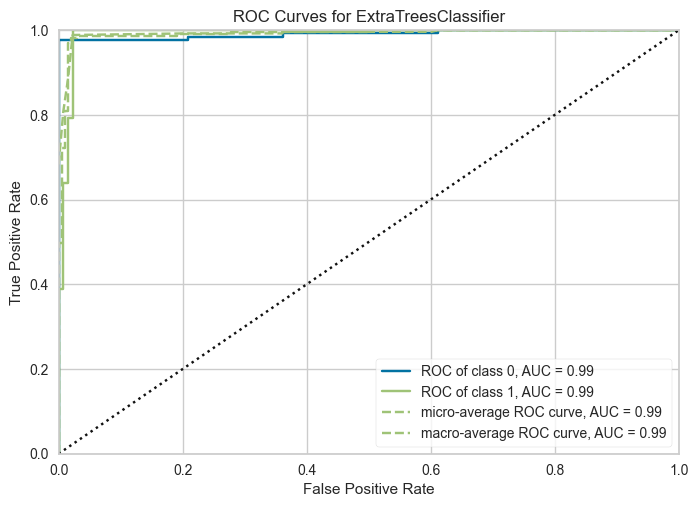

In [11]:
plot_model(tune_et)

Note : 

Dapat diketahui dari gambar tersebut bahwa semakin ke kiri atas garis ROC nya, baik untuk class 0 dan 1, itu menandakan semakin baik modelnya, dari gambar tersebut bisa disimpulkan bahwa model sudah mendapatkan akurasi terbaiknya yaitu mendekati 1, dimana model bisa mendeteksi secara akurat antara class 0 dan class 1, untuk modelnya saya menggunakan extra trees yang sudah di tuning

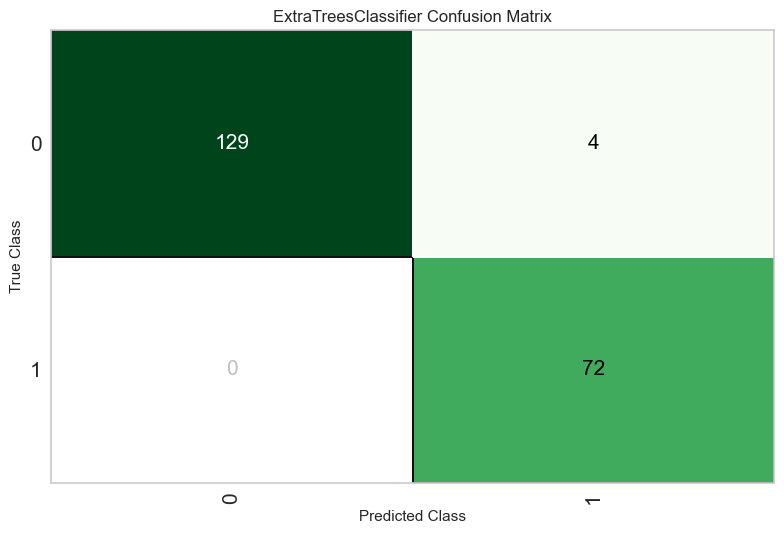

In [12]:
plot_model(tune_et, plot='confusion_matrix')

Note : 

- TN (True Negative) = 129
- FP (False Positive) = 4
- FN (False Negative) = 0
- TP (True Positive) = 72

dari penjelasan singkat diatas bisa disimpulkan bahwa model yang saya gunakan sudah sangat baik dalam membedakan antara class 0 dan class 1, model bisa menebak 129 data sebagai class 0 dan itu benar, ada 4 data yg harusnya masuk pada class 0 tetapi model mengira masuk ke class 1, kemudian semua data class 1 bisa di tebak secara benar semua tanpa ada kesalahan sebanyak 72 data, tidak ada yg salah

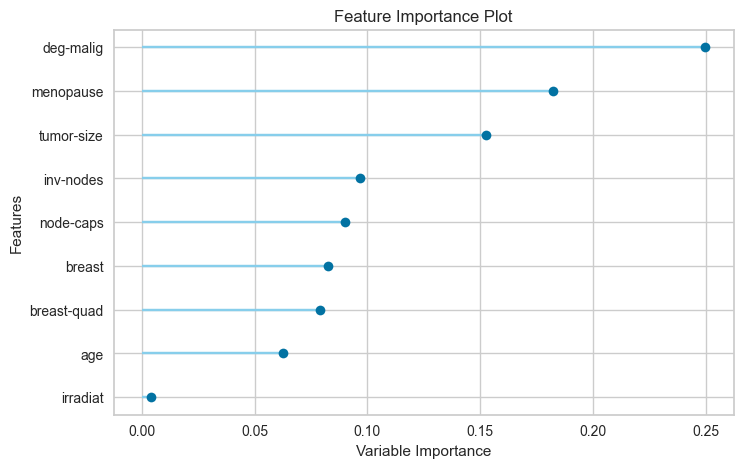

In [13]:
plot_model(tune_et, plot='feature')

Note : 

Dari gambar tersebet bisa diketahui bahwa fitur yang sangat penting pada dataset tersebut adalah deg-malig, menopause dan tumor-size

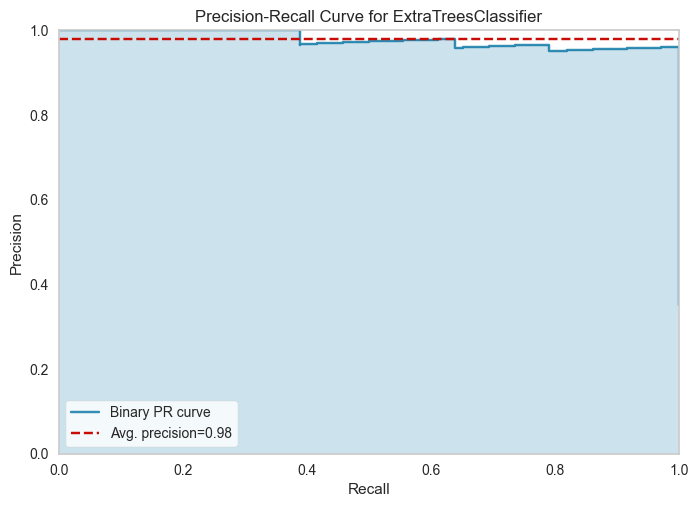

In [14]:
plot_model(tune_et, plot='pr')

Note : 

Dari gambar diatas bisa disimpulkan bahwa nilai precision recall dari model yang saya pakai sangatlah bagus, untuk rata" precisionnya hampir menuju angka 1, ini menandakan bahwa model saya bisa mengklasifikasikan dengan baik dan benar antara class 0 dan class 1 tanpa ada miss

# Interpret Model

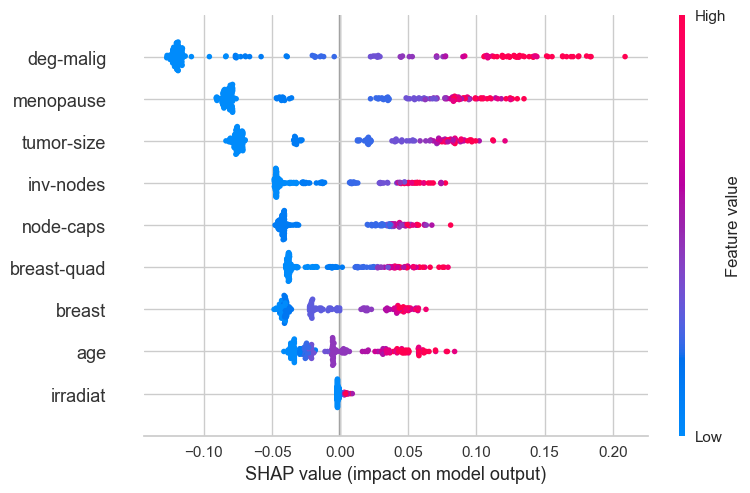

In [15]:
interpret_model(tune_et, plot='summary')

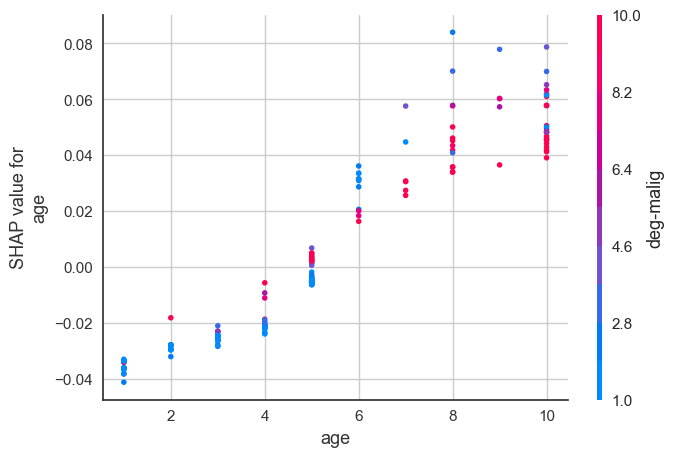

In [16]:
interpret_model(tune_et, plot='correlation')

# Predict Model

In [23]:
pred_model = predict_model(tune_et)
pred_model.head(3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9805,0.9911,1.0000,0.9474,0.9730,0.9577,0.9586


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class,prediction_label,prediction_score
265,7,2,4,1,3,4,3,3,1,1,1,0.5941
394,2,3,2,2,2,2,3,1,1,0,0,0.7318
337,2,1,1,1,2,1,3,1,1,0,0,0.9655


Note : 

Dapat diketahui bahwa predict_model bertujuan untuk mencocokan hasil prediksi label dengan class sebelumnya, apakah prediksinya tepat atau salah

# Save Model

In [24]:
save_model(tune_et, model_name='best_model_classification')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'menopause', 'tumor-size',
                                              'inv-nodes', 'node-caps',
                                              'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('cat...
                  ExtraTreesClassifier(bootstrap=True, 

Note : 

Setelah dilakukan beberapa tahapan sebelumnya, kemudian model akan disimpan ke dalam file dengan format .pkl

# Load Best Model

In [25]:
load_best = load_model('best_model_classification')
print(load_best)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'menopause', 'tumor-size',
                                             'inv-nodes', 'node-caps',
                                             'deg-malig', 'breast',
                                             'breast-quad', 'irradiat'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mea...
                 ExtraTreesClass

Note :

Setelah model disimpan, maka kita tidak perlu melakukan run ulang mulai dari awal, tinggal memanggil model yang sudah kita simpan sebelumnya dengan format .pkl

# Deploy Model

In [26]:
import gradio as gr
import pandas as pd
from pycaret.classification import load_model, predict_model

# Load model dari PyCaret (pastikan file best_model_classification.pkl ada di folder yg sama)
model = load_model("best_model_classification")

# Kolom fitur
features = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
            'deg-malig', 'breast', 'breast-quad', 'irradiat']

def predict_cancer(age, menopause, tumor_size, inv_nodes, node_caps, deg_malig, breast, breast_quad, irradiat):
    try:
        # Siapkan input untuk prediksi
        input_df = pd.DataFrame([[
            age, menopause, tumor_size, inv_nodes, node_caps,
            int(deg_malig), breast, breast_quad, irradiat
        ]], columns=features)

        result = predict_model(model, data=input_df)

        pred = result.loc[0, 'prediction_label']
        prob = result.loc[0, 'prediction_score']

        if pred == 'no-recurrence-events':
            status = "🟢 Tidak ada kanker berulang"
        else:
            status = "🔴 Terindikasi kanker berulang"

        return f"{status}\n\nProbabilitas: {prob:.2%}"

    except Exception as e:
        return f"❌ Error: {str(e)}"

with gr.Blocks(theme=gr.themes.Soft(), title="🧬 Breast Cancer Classifier") as demo:
    gr.Markdown("## 🧬 Breast Cancer Prediction (Modern UI)")
    gr.Markdown("Isi data pasien di bawah ini, dan sistem akan memprediksi kemungkinan kanker payudara berulang.")

    with gr.Row():
        with gr.Column(scale=1):
            age = gr.Dropdown(['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'], label="Age")
            menopause = gr.Dropdown(['lt40', 'ge40', 'premeno'], label="Menopause")
            tumor_size = gr.Dropdown(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34'], label="Tumor Size")
            inv_nodes = gr.Dropdown(['0-2', '3-5', '6-8', '9-11', '12-14'], label="Inv Nodes")
            node_caps = gr.Dropdown(['yes', 'no'], label="Node Caps")
            deg_malig = gr.Dropdown(['1', '2', '3'], label="Degree of Malignancy")
            breast = gr.Dropdown(['left', 'right'], label="Breast")
            breast_quad = gr.Dropdown(['left_up', 'left_low', 'right_up', 'right_low', 'central'], label="Breast Quadrant")
            irradiat = gr.Dropdown(['yes', 'no'], label="Irradiat")

            submit_btn = gr.Button("🔍 Predict")

        with gr.Column(scale=1):
            output = gr.Textbox(label="🧾 Prediction Result", lines=5)

    submit_btn.click(
        fn=predict_cancer,
        inputs=[age, menopause, tumor_size, inv_nodes, node_caps, deg_malig, breast, breast_quad, irradiat],
        outputs=output
    )

demo.launch()

Transformation Pipeline and Model Successfully Loaded
* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Note : 

Setelah disimpan dan dipanggil, kita bisa memvisualisasikan model yang akan kita latih lagi dengan menggunakan User Interface seperti pada program diatas yang menggunakan Gradio